DOMAIN: Smartphone, Electronics

DATA DESCRIPTION:
• author : name of the person who gave the rating
• country : country the person who gave the rating belongs to
• data : date of the rating
• domain: website from which the rating was taken from
• extract: rating content
• language: language in which the rating was given
• product: name of the product/mobile phone for which the rating was given
• score: average rating for the phone
• score_max: highest rating given for the phone
• source: source from where the rating was taken

PROJECT OBJECTIVE: We will build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively

In [1]:
import os
import numpy as np  
import pandas as pd
from surprise.model_selection import train_test_split

In [2]:
F1 = pd.read_csv("phone_user_review_file_1.csv",encoding='latin1')
F2 = pd.read_csv("phone_user_review_file_2.csv",encoding='latin1')
F3 = pd.read_csv("phone_user_review_file_3.csv",encoding='latin1')
F4 = pd.read_csv("phone_user_review_file_4.csv",encoding='latin1')
F5 = pd.read_csv("phone_user_review_file_5.csv",encoding='latin1')
F6 = pd.read_csv("phone_user_review_file_6.csv",encoding='latin1')

In [3]:
print ('\nColumns and shape of F1\n', F1.columns,F1.shape)
print ('\nColumns and shape of F2\n', F2.columns,F2.shape)
print ('\nColumns and shape of F3\n', F3.columns,F3.shape)
print ('\nColumns and shape of F4\n', F4.columns,F4.shape)
print ('\nColumns and shape of F5\n', F5.columns,F5.shape)
print ('\nColumns and shape of F6\n', F6.columns,F6.shape)
# We can see that all the files have same number of columns, hence we can concat them together to make one single dataset


Columns and shape of F1
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object') (374910, 11)

Columns and shape of F2
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object') (114925, 11)

Columns and shape of F3
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object') (312961, 11)

Columns and shape of F4
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object') (98284, 11)

Columns and shape of F5
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object') (350216, 11)

Columns and shape of F6
 Index(['phone_url', 'date

In [4]:
Main_F = pd.concat([F1,F2,F3,F4,F5,F6], ignore_index=True)
Main_F.shape

(1415133, 11)

In [5]:
Main_F.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [6]:
Main_F.isnull().sum().sum()
#We have total of 20952 missing values

209542

In [7]:
Main_F.isnull().sum()
# We can see that we haev null values in score . score_max, extract, author and product
# out of which we can try imputing values for score and score_max with mean values,
# however we can not impute values for Author, extract and product - hence we can drop those records

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [8]:
Main_F['score'].round()

0          10.0
1          10.0
2           6.0
3           9.0
4           4.0
           ... 
1415128     2.0
1415129    10.0
1415130     2.0
1415131     8.0
1415132     2.0
Name: score, Length: 1415133, dtype: float64

In [9]:
Main_F['score_max'].round()

0          10.0
1          10.0
2          10.0
3          10.0
4          10.0
           ... 
1415128    10.0
1415129    10.0
1415130    10.0
1415131    10.0
1415132    10.0
Name: score_max, Length: 1415133, dtype: float64

In [10]:
Main_F.describe().T
# we can use mean of both columns to replace null values

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [11]:
# Lets fill the null values of Score and Score_max with the mean  

#Replace blank valus with Nan values
Main_F = Main_F.replace('', np.nan)

#Replace the Null value with the mean value of each column
for columns in Main_F[['score','score_max']]:
    mean = Main_F[columns].mean()
    Main_F[columns] = Main_F[columns].fillna(mean)

In [12]:
Main_F.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63202
product          1
dtype: int64

In [13]:
#Lets drop null rating comment and the name of the author 
Main_F.dropna(inplace=True)
Main_F.shape

(1336416, 11)

In [14]:
Main_F.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [15]:
# Check for duplicate data

dups = Main_F.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Main_F[dups]

Number of duplicate rows = 4809


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,9.60000,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,9.60000,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,9.60000,10.0,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.00000,10.0,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.00000,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
...,...,...,...,...,...,...,...,...,...,...,...
1395209,/cellphones/nokia-6310i/,7/22/2011,ru,ru,Yandex,market.yandex.ru,10.00000,10.0,ÐÑÐµÐ½Ñ Ð¶Ð°Ð»ÐµÑ Ð¾Ð± ÑÑÑÐ°ÑÐµ ÑÑÐ¾...,alienwarfiend,Nokia 6310i
1395255,/cellphones/nokia-6310i/,11/19/2009,ru,ru,Yandex,market.yandex.ru,10.00000,10.0,"Ð£ Ð¼ÐµÐ½Ñ ""NOKIA 6310i"" ÑÐ¶Ðµ Ð±Ð¾Ð»ÐµÐµ 3-...",Yurigin70,Nokia 6310i
1398120,/cellphones/nokia-8850/,8/23/2014,ru,ru,Yandex,market.yandex.ru,10.00000,10.0,ÐÐ°Ð½Ð½ÑÐ¹ Ð¾ÑÐ·ÑÐ² Ð½Ð°Ð¿Ð¸ÑÐ°Ð½ Ð»Ð¸ÑÑ...,ÐÐ²Ð°Ð½Ð¾Ð² ÐÐµÐ½Ð¸Ñ,Nokia 8850
1410207,/cellphones/samsung-sgh-600/,4/30/2015,tr,tr,Cepworld,cepworld.com,8.00706,10.0,varsa satan 05312614607,muhsin,Samsung (936) SGH-600


In [16]:
# Remove duplicate rows

print('Number of rows before discarding duplicates = ' , Main_F.shape)
Main_F.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = ' ,Main_F.shape)

Number of rows before discarding duplicates =  (1336416, 11)
Number of rows after discarding duplicates =  (1331607, 11)


In [17]:
Mobiledata = Main_F.sample(n=1000000,random_state=612)
Mobiledata.shape

(1000000, 11)

In [18]:
#Lets take important features like Author, Product, and Score
Mobiledata_new = Mobiledata[['author','product','score']]
Mobiledata_new.head()

,author,product,score
139931,Nestor,Smartphone Asus Zenfone 3 ZE520KL - 1B075BR Oc...,10.00000
279854,Clark,"BlackBerry DTEK50 Unlocked GSM 5.2"" Touchscree...",10.00000
143967,AndrÃ© Ryodi Nogami,Smartphone Samsung Galaxy A5 2016 Duos A510 De...,8.00706
1056485,Tiffany Stevenson,Sony Ericsson XPERIA X10 Mini Pro (U20i) Unloc...,4.00000
1107720,xceday,Nokia 3720 Classic cep telefonu,8.00706


## Most rated Product 

In [19]:
Mobiledata_new.groupby('product')['score'].count().sort_values(ascending = False)

product
Lenovo Vibe K4 Note (White,16GB)                                                                                       3908
Lenovo Vibe K4 Note (Black, 16GB)                                                                                      3234
OnePlus 3 (Graphite, 64 GB)                                                                                            3128
OnePlus 3 (Soft Gold, 64 GB)                                                                                           2643
Samsung Galaxy Express I8730                                                                                           2012
                                                                                                                       ... 
NOKIA N9 16 GB - black                                                                                                    1
NOKIA N91                                                                                                                 1


## Users with most number of reviews

In [20]:
Mobiledata_new.groupby('author')['score'].count().sort_values(ascending = False)


author
Amazon Customer    57792
Cliente Amazon     14624
e-bit               6317
Client d'Amazon     5698
Amazon Kunde        3574
                   ...  
Zheng xinyan           1
Zhengtai W.            1
Zhenich                1
Zheniczak              1
 efef                  1
Name: score, Length: 620168, dtype: int64

## Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [21]:
pcount = Mobiledata_new['product'].value_counts()
Pdata = Mobiledata_new[Mobiledata_new['product'].isin(pcount[pcount > 50].index)]
print('Shape of the data with products rated more than 50 times:',Pdata.shape)
print ('Product with more than 50 ratings\n', Pdata['product'].value_counts())


Shape of the data with products rated more than 50 times: (559763, 3)
Product with more than 50 ratings
 Lenovo Vibe K4 Note (White,16GB)                                                                                            3908
Lenovo Vibe K4 Note (Black, 16GB)                                                                                           3234
OnePlus 3 (Graphite, 64 GB)                                                                                                 3128
OnePlus 3 (Soft Gold, 64 GB)                                                                                                2643
Samsung Galaxy Express I8730                                                                                                2012
                                                                                                                            ... 
Nokia 301 Sim Free Mobile Phone - White                                                                                  

In [22]:
acount = Mobiledata_new['author'].value_counts()
Adata = Mobiledata_new[Mobiledata_new['author'].isin(acount[acount > 50].index)]
print('Shape of the data with authors who rated more than 50 times:',Adata.shape)
print ('AUthors with more than 50 ratings\n', Adata['author'].value_counts())


Shape of the data with authors who rated more than 50 times: (177691, 3)
AUthors with more than 50 ratings
 Amazon Customer    57792
Cliente Amazon     14624
e-bit               6317
Client d'Amazon     5698
Amazon Kunde        3574
                   ...  
User                  51
Irene                 51
mrgreg                51
Bezlikiy_Djo          51
Carla                 51
Name: author, Length: 674, dtype: int64


In [23]:
final_dataset = Mobiledata_new[Mobiledata_new['author'].isin(Adata['author']) & Mobiledata_new['product'].isin(Pdata['product']) ]
print ('The shape of the dataset with product been rated more than 50 times AND by user who have given more than 50 ratings is: \n',final_dataset.shape)

The shape of the dataset with product been rated more than 50 times AND by user who have given more than 50 ratings is: 
 (108809, 3)


In [24]:
final_dataset.head()

,author,product,score
352217,mario,"Samsung G900 Galaxy S5 Smartphone, 16 GB, Nero...",8.0
77416,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",10.0
531348,Amazon Customer,"Apple iPhone 5s (Space Grey, 16GB)",10.0
512655,Amazon Customer,"Lenovo Vibe K5 (Grey, VoLTE update)",8.0
409076,Roberto,LG G3 8806084954985 4G 16GB Black smartphone -...,10.0


## Lets build the popularity based model and recommend top 5 mobile phones
#### so we will take mean rating of all produts and then recommend the top 5 most popular products to all the customers

In [25]:
def PopularityRecommender(user,data):
    popular_products = data.groupby('product')['score'].mean().sort_values(ascending = False)
    print ('Top 5 products that are most popular (With their Avg. rating) which can be recommended to user "', user,'" are:\n\n ',popular_products.head(5))
    

In [26]:
PopularityRecommender ('mario',final_dataset)

Top 5 products that are most popular (With their Avg. rating) which can be recommended to user " mario " are:

  product
3220                                                                        10.0
SAMSUNG Galaxy S5 - blanc - Smartphone                                      10.0
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Windows Phone 8 Tela...    10.0
LG 840G Prepaid Phone (Net10)                                               10.0
LG A290                                                                     10.0
Name: score, dtype: float64


In [27]:
PopularityRecommender ('Amazon Customer' , final_dataset)

Top 5 products that are most popular (With their Avg. rating) which can be recommended to user " Amazon Customer " are:

  product
3220                                                                        10.0
SAMSUNG Galaxy S5 - blanc - Smartphone                                      10.0
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Windows Phone 8 Tela...    10.0
LG 840G Prepaid Phone (Net10)                                               10.0
LG A290                                                                     10.0
Name: score, dtype: float64


We can see that Popularity based model will always take the most popular products (w.r.t the rating given by the users to each product) and then accordingly recommend those products to any user with out considering the user's personal preferences.

#### Creating Collaborative model using SVD

In [28]:
from surprise import SVD
from surprise import accuracy

In [29]:
#Split the data randomnly into test and train datasets in the ratio 70:30
from surprise import Dataset,Reader

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(final_dataset, reader)


In [30]:
trainset, testset = train_test_split(data, test_size=.30)

In [31]:
trainset

In [32]:
svd_model = SVD(n_factors=150,reg_all = 0.01,lr_all=0.001)
svd_model.fit(trainset)

In [33]:
test_pred_1 = svd_model.test(testset)

In [34]:
accuracy.rmse(test_pred_1)

RMSE: 2.6136


2.613578692691632

In [35]:
# use grid search for finding out the best hyerparameters to check if we can further reduce the RMSE 

from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [50, 100, 150, 200], 'lr_all': [0.003, 0.005, 0.008],'reg_all': [0.4, 0.6, 0.8]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.5998513352429073
{'n_factors': 200, 'lr_all': 0.005, 'reg_all': 0.4}


Since the RMSE score is not reduce significatly, we can still stick to the existing model that is created.

#### Now lets try build User user based collaborative model and Item item based collaborative model usng KNNWithMeans

In [36]:
from surprise import KNNWithMeans

# item-based collaborative filtering
itemCF = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
itemCF.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [37]:
# run the trained model against the testset
test_pred = itemCF.test(testset)

In [38]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 2.6991


2.699105883580292

In [39]:
test_pred
# We can see that for each user, model have predicted average ratings

[Prediction(uid='Amazon Customer', iid='Lenovo Vibe X3 (White, 32GB)', r_ui=10.0, est=7.8, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Samsung Galaxy J7 No Contract Phone, 16GB ROM / 2GB RAM, 5.5 Inch - White - (Boost Mobile)', r_ui=10.0, est=8.155831170530716, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='OnePlus X (Onyx, 16GB)', r_ui=2.0, est=7.4399999999999995, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Lenovo Vibe X3 (White, 32GB)', r_ui=8.0, est=7.8, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='einer Kundin', iid='Apple iPhone 7 4,7" 32 GB', r_ui=10.0, est=9.8, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='OnePlus 3 (Soft Gold, 64 GB)', r_ui=8.0, est=8.68, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Nokia Lumia 521 (Metro PC

In [40]:
# user-based  collaborative filtering
userCF = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
userCF.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [41]:
# run the trained model against the testset
test_pred_3 = userCF.test(testset)

In [42]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_3, verbose=True)

User-based Model : Test Set
RMSE: 2.7616


2.761570848472175

In [43]:
test_pred_3
# We can see that for each user, model have predicted average ratings

[Prediction(uid='Amazon Customer', iid='Lenovo Vibe X3 (White, 32GB)', r_ui=10.0, est=7.799999999999999, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Samsung Galaxy J7 No Contract Phone, 16GB ROM / 2GB RAM, 5.5 Inch - White - (Boost Mobile)', r_ui=10.0, est=8.145814147855198, details={'actual_k': 44, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='OnePlus X (Onyx, 16GB)', r_ui=2.0, est=7.4399999999999995, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Lenovo Vibe X3 (White, 32GB)', r_ui=8.0, est=7.799999999999999, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='einer Kundin', iid='Apple iPhone 7 4,7" 32 GB', r_ui=10.0, est=9.8, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='OnePlus 3 (Soft Gold, 64 GB)', r_ui=8.0, est=8.68, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', ii

#### Let's try using Cosine similarity technique to see if it impacts the performance 

In [44]:
# user-based  collaborative filtering
cosineuserCF = KNNWithMeans(k=150, min_k=25, sim_options={'name': 'cosine', 'user_based': True})
cosineuserCF.fit(trainset)

# run the trained model against the testset
test_pred_4 = cosineuserCF.test(testset)

# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_4, verbose=True)

test_pred_4
# We can see that by using cosine similarity method, model performs slighlty better.. 

Computing the cosine similarity matrix...
Done computing similarity matrix.
User-based Model : Test Set
RMSE: 2.6353


[Prediction(uid='Amazon Customer', iid='Lenovo Vibe X3 (White, 32GB)', r_ui=10.0, est=7.426666666666667, details={'actual_k': 150, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Samsung Galaxy J7 No Contract Phone, 16GB ROM / 2GB RAM, 5.5 Inch - White - (Boost Mobile)', r_ui=10.0, est=8.00332728492956, details={'actual_k': 51, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='OnePlus X (Onyx, 16GB)', r_ui=2.0, est=7.773333333333335, details={'actual_k': 150, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Lenovo Vibe X3 (White, 32GB)', r_ui=8.0, est=7.426666666666667, details={'actual_k': 150, 'was_impossible': False}),
 Prediction(uid='einer Kundin', iid='Apple iPhone 7 4,7" 32 GB', r_ui=10.0, est=9.831496152338172, details={'actual_k': 150, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='OnePlus 3 (Soft Gold, 64 GB)', r_ui=8.0, est=8.626666666666665, details={'actual_k': 150, 'was_impossible': False}),
 Predic

#### Let's try recommending top 5 products for test users.

In [45]:
from collections import defaultdict

# create a funtion to return  top n recommends
def get_top_n(predictions, n):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
         top_n[uid].append((iid, est))
       

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [46]:
top_products = get_top_n(test_pred_1,5) # using test preds from SVD because it has the best performace so far
#List of 5 products recommended to Mario
print ('Top 5 products that can be suggested to custoemr mario are:\n',top_products.get('mario'))

Top 5 products that can be suggested to custoemr mario are:
 [("Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia]", 9.24002370197064), ("Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]", 8.918240578173714), ('LG D620 G2 Mini Smartphone, 8 GB, Bianco [Italia]', 8.528398035384532), ('Nokia Lumia 720 Smartphone, Dual Core, Windows 8, Bianco [Italia]', 8.435550873879004), ('Samsung Corby II', 8.348228960280798)]


In [47]:
#Let's print the recommended items for each user
for uid, user_ratings in top_products.items():
    print(uid,'\n', [iid for (iid, _) in user_ratings],'\n')

Amazon Customer 
 ["ZeroLemon [180 days warranty] ZeroLemon Samsung Galaxy S III 7000mAh Extended Battery + Free Black Extended TPU Full Edge Protection Case / ***NFC for S Beam and Google Wallet***- WORLD'S HIGHEST S3 BATTERY CAPACITY - Black", "ZeroLemon [180 days warranty] ZeroLemon Samsung Galaxy S III 7000mAh Extended Battery + Free Black Extended TPU Full Edge Protection Case / ***NFC for S Beam and Google Wallet***- WORLD'S HIGHEST S3 BATTERY CAPACITY - Black", "ZeroLemon [180 days warranty] ZeroLemon Samsung Galaxy S III 7000mAh Extended Battery + Free Black Extended TPU Full Edge Protection Case / ***NFC for S Beam and Google Wallet***- WORLD'S HIGHEST S3 BATTERY CAPACITY - Black", "ZeroLemon [180 days warranty] ZeroLemon Samsung Galaxy S III 7000mAh Extended Battery + Free Black Extended TPU Full Edge Protection Case / ***NFC for S Beam and Google Wallet***- WORLD'S HIGHEST S3 BATTERY CAPACITY - Black", 'Huawei Mate 9 with Amazon Alexa and Leica Dual Camera - 64GB Unlocked Ph

 ['Apple iPhone 5s 16GB (Ñ\x81ÐµÑ\x80Ñ\x8bÐ¹ ÐºÐ¾Ñ\x81Ð¼Ð¾Ñ\x81)', 'Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼)', 'Samsung N7100 Galaxy Note II 16GB (Ñ\x81ÐµÑ\x80Ñ\x8bÐ¹)', 'Sony Xperia Z1 Compact (Ñ\x80Ð¾Ð·Ð¾Ð²Ñ\x8bÐ¹)', 'Sony Xperia M (Ð±ÐµÐ»Ñ\x8bÐ¹)'] 

carlos 
 ['Smartphone Nokia Lumia 630 Preto Dual Sim, Tv Digital ,Windows Phone 8.1, Tela 4.5", QuadCore 1.2GHz, CÃ¢m. 5MP, WiFi, Bluetooth e A-Gps -Tim', 'Smartphone Motorola Moto X 2Âª GeraÃ§Ã£o XT1097 32 GB', 'Smartphone Motorola Moto X 2Âª GeraÃ§Ã£o XT1097 32 GB', 'BlackBerry Curve 9310 Prepaid Phone (Boost Mobile)', 'BQ Aquaris E5 LTE - Smartphone libre Android (pantalla 5 pulgadas, cÃ¡mara 13 Mp. 16 GB, Qualcomn Snapdragon 410 Quad-Core A53, 2 GB RAM), color negro'] 

Anne 
 ['Samsung Galaxy S7 goud, roze / 32 GB', 'Samsung Galaxy S7 goud, roze / 32 GB', 'Huawei P8lite zwart / 16 GB', 'HTC Wildfire', 'Samsung Galaxy Ace Plus'] 

Massimiliano 
 ['Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kiri

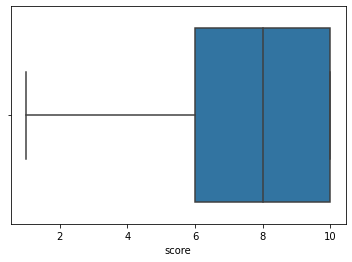

In [48]:
import seaborn as sns

sns.boxplot(final_dataset['score'])
# SInce we do not have any outliers we can stick around with the same set of data.

In [49]:
#Applying CV to see if any of the model can get better results or not

from surprise.model_selection.validation import cross_validate
from surprise import SVD

benchmark = []
SVD_model = SVD()
user_user_CF = KNNWithMeans(sim_options={'name': 'cosine','user_based': True})
item_item_CF = KNNWithMeans(sim_options={'name': 'cosine','user_based': False})

for algo in [SVD_model,user_user_CF, item_item_CF]:
    results = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algo).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm')

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,2.659452,6.371936,0.479716
KNNWithMeans,2.660565,1.852721,7.960357
KNNWithMeans,2.670973,186.798373,459.854695


In [50]:
#We can see that after trying CV as well, model's performance is near about same as earlier
# also we can see that SVD model has better RMSE score than item item based CF and user user based CF models

#### In what business scenario you should use popularity based Recommendation Systems ?

Popularity based recommendation systems can be used when we dont have much of the user information, which means for a given context, if we dont know who the customer is and what are his preferences, we can just recommend the most popular (either most rated products / or most selling products) to any new user coming in.

#### In what business scenario you should use CF based Recommendation Systems ?

Collaborative filtering recommendation system can be used when we have enough user data or enough item data. Based on our requirement, when we want to recommend smililar customers with products they might like we can use "User user based recommendation system" which can identify similar customers having common characteristic and recommend products of one another.
On the contrary, when we want to recommend similar products to intrested customers we can use "Item item based recommendation system" which can identify products having similar characteristics like highly rated products, or genre of the movies, such products are considered to be similar to one another and coupled togrther. recommendions are made to users associated with one of the items in the group of similar products with all the other products of the same group.

#### What other possible methods can you think of which can further improve the recommendation for different users ?

Other possible methods which can improve better recommendations can be Market based analysis and hybrid recommendations systems.
Market based analysis: where in current customer market trend is read and analysis is done on the products that are bought together by customers, resulting in the pairwise products which can be recommended to other customers buying either of the product from the list of pairs.
Hybrid recommendations method: where in different recommendation methods can be combined together and used to give better results of recommendations. Based on the context, we can use Content based method to find similar products and then use using collabarative method find similar users and recommend them with simialr content based products. 